In [1]:
import os
import sys
sys.path.append('./src')
from src.utils import *

## Define Your Session

In [2]:
session_path = 'results/a734d44e584c34be5a8f9b74f0fed58b' # Define your session path

In [3]:
info_path = os.path.join(session_path, 'info.json')
session_info = json2dict(info_path)
for i in session_info.items():
    print(i[0], '--', i[1])

id -- ./results/a734d44e584c34be5a8f9b74f0fed58b
model_name -- vit_b_16
train_data_dir -- /content/drive/MyDrive/Datasets/depth_None_True/trainset.pkl
test_data_dir -- E:/depth_None_True/testset.pkl
epochs -- 100
batch_size -- 128
learning_rate -- 2e-05
drop_rate -- 0.1
pre_trained -- True
device -- cuda
save_interval -- -1
patience -- 30
train_split -- 0.9
total_params -- 86323969


In [4]:
data_path = validate_and_prompt_path(session_info['test_data_dir'])
print('...loading dataset')
dataset = create_dataset_from_preprocessed(data_path, None)
print('...dataset loading completed')

The provided path is valid.
...loading dataset
...dataset loading completed


# Prediction Visualization

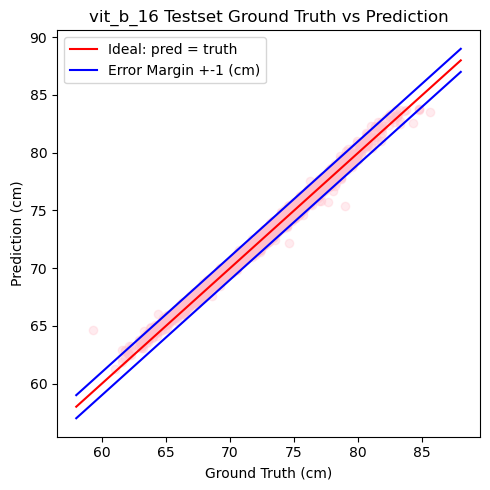

In [5]:
pred_vis(session_path, '', False)

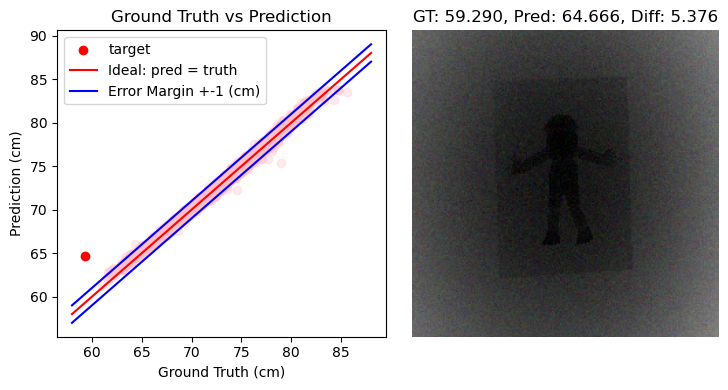

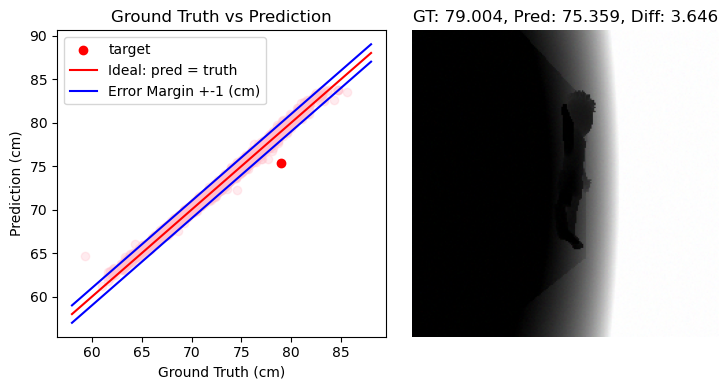

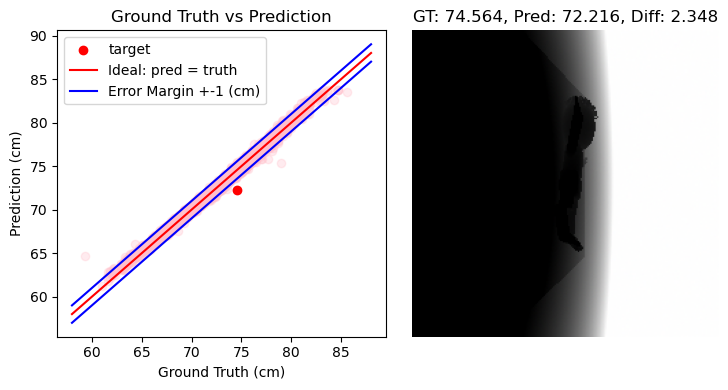

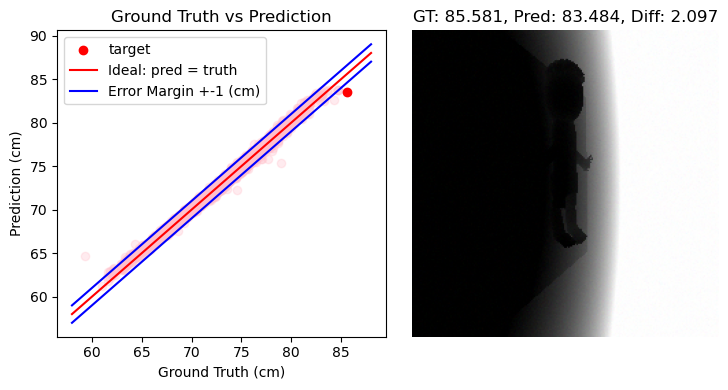

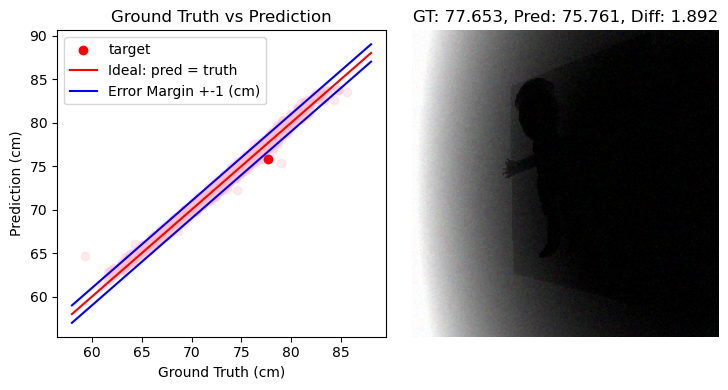

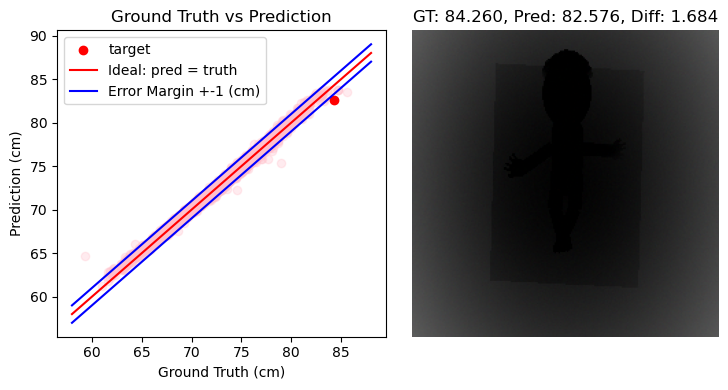

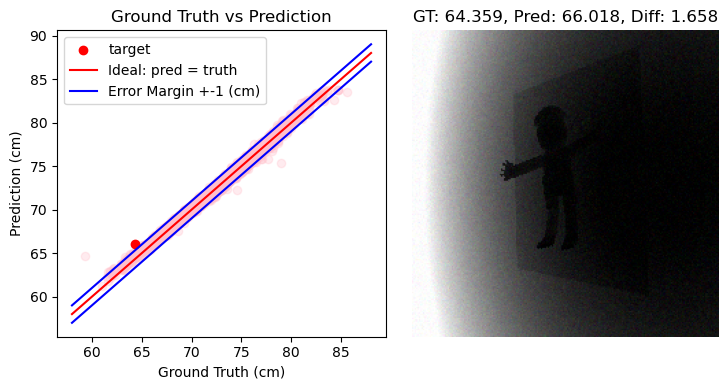

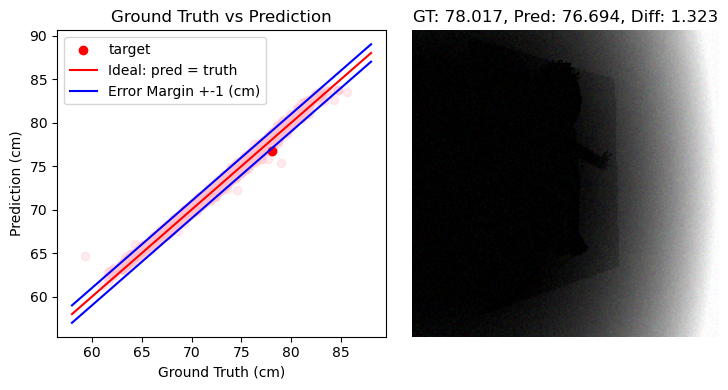

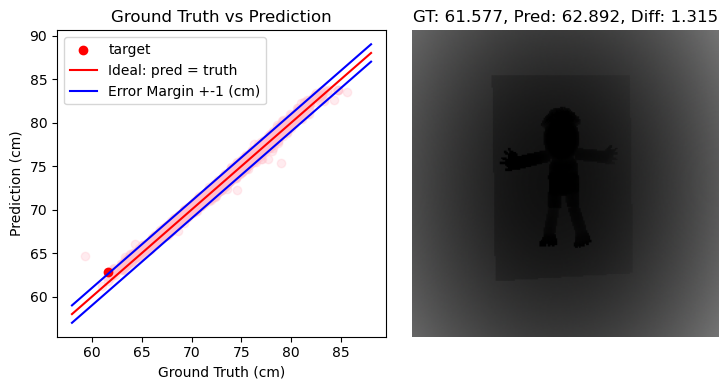

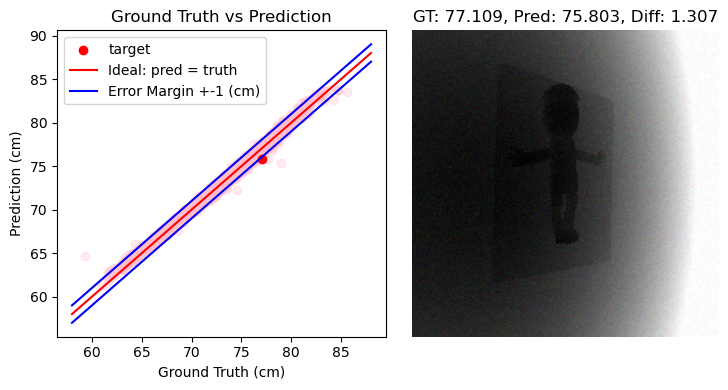

In [6]:
worst_pred(session_path, dataset, list(range(0,10)), 'abs')